# Day 3 Exercise - Analyzing and interpreting time series

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#### Data Prep

In [61]:
# read and process the charts dataset
df = pd.read_csv('data/spotify_daily_charts.csv')
#transform date column into a datetime column
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,position,track_id,track_name,artist,streams
date,,,,,
2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


## Instructions

1. Pick one artist that had appeared in the Spotify charts from 2017-2021 and create a time series plot of their total daily streams. 

2. Quickly describe the resulting time series plot, following the key points discussed in class. 

3. *Analysis* Is there a noticeable trend and/or seasonality in the time series?

   A. Plot the STL decomposition of the time series? Which among the components were dominating the streams?
   
   B. Identify significant lags using the ACF/PACF plots. Having seen the time series plot, are these values expected? Why or why not?

5. Briefly share your output with the group

*Submit this notebook at the end of class time*

## 1. Time series plot

In [71]:
artist_df = df[df['artist'] == 'Taylor Swift'].loc['2017-01-01':'2021-12-31']['streams'].resample('D').sum()
artist_df.fillna(0)

date
2017-06-09    255708
2017-06-10    430597
2017-06-11    291076
2017-06-12    261895
2017-06-13    219158
               ...  
2021-12-27    536416
2021-12-28    547640
2021-12-29    561801
2021-12-30    557435
2021-12-31    614481
Freq: D, Name: streams, Length: 1667, dtype: int64

Text(0.5, 1.0, 'Taylor Swift Daily Streams')

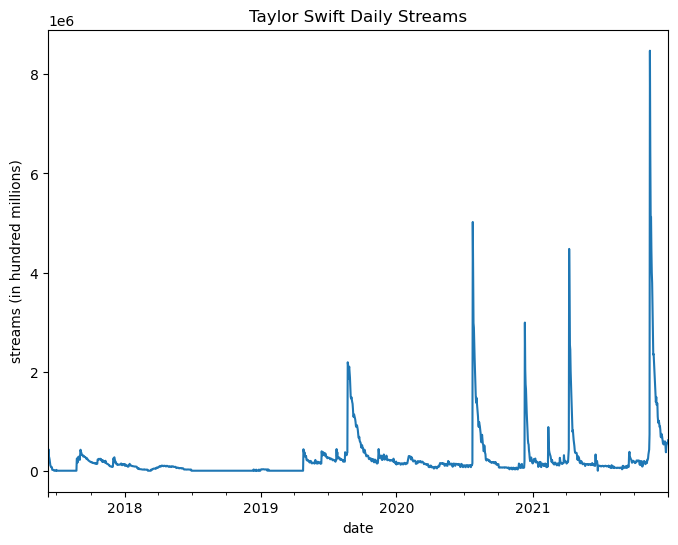

In [72]:
#line chart of monthly streams
fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
artist_df.plot(ax=ax, kind='line')

plt.ylabel('streams (in hundred millions)')
plt.title('Taylor Swift Daily Streams')

Rolling Daily Stream

Text(0.5, 1.0, 'Spotify Daily Streams: Taylor Swift')

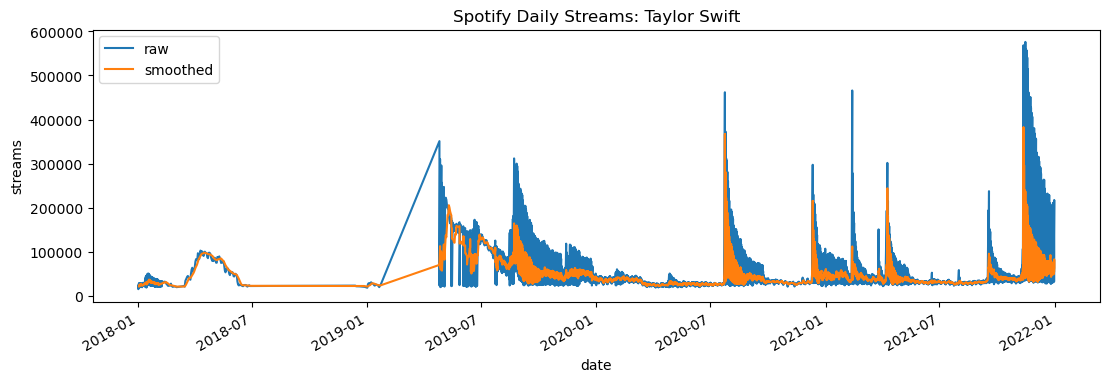

In [75]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)

data1 = df[df['artist']=='Taylor Swift'].loc['2018-01-01':'2021-12-31']['streams']
data2 = df[df['artist']=='Taylor Swift'].loc['2018-01-01':'2021-12-31']['streams'].rolling(7).mean()

data1.plot(ax=ax, label='raw')
data2.plot(ax=ax, label='smoothed')

plt.legend()
plt.ylabel('streams')
plt.title('Spotify Daily Streams: Taylor Swift')

## 2. Insights about the time series plot

Outliers? Sudden shifts?

Trends?

- No clear trends

Cycles? Seasons?

- There is a pattern where there is a sudden rise and gradual fall

## 3. Time series analysis

## STL

<AxesSubplot:xlabel='date'>

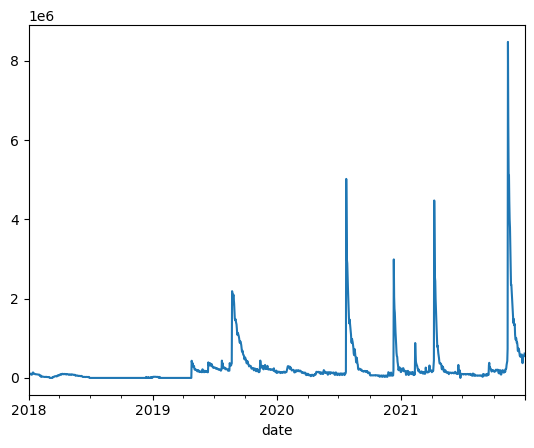

In [53]:
artist_df.plot()

In [28]:
import statsmodels.api as sm

Text(0.5, 1.01, 'Taylor Swift Daily Streams ')

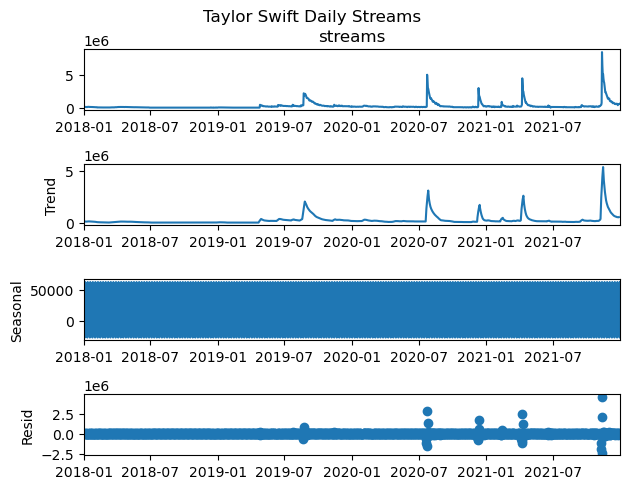

In [54]:
res = sm.tsa.seasonal_decompose(artist_df.interpolate())
resplot = res.plot()
plt.suptitle("Taylor Swift Daily Streams ", y=1.01)

In [50]:
# data_decomposed = artist_df.copy()
# data_decomposed['trend_component'] = res.trend
# data_decomposed['seasonal_component'] = res.seasonal
# data_decomposed['residual_component'] = res.resid

# data_decomposed.tail(400).plot()

Insights abt STL here

- There is no specific trend
- No seasonal patterns
- There are some residual values

## ACF / PACF

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

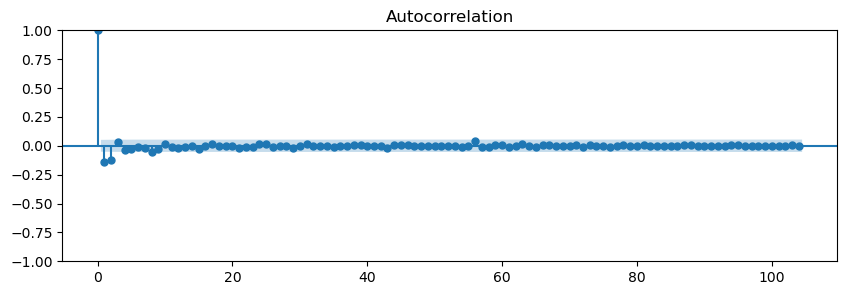

In [56]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

acf = plot_acf(artist_df.interpolate().diff()[1:], lags=104, ax=ax)

C:\Anaconda\envs\sprint1\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


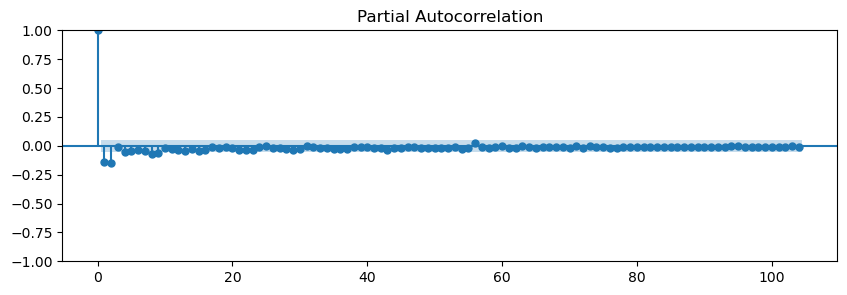

In [57]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

pacf = plot_pacf(artist_df.interpolate().diff()[1:], lags=104, ax=ax)
#pacf.get_xdata()

Insights abt ACF/PACF here

- The auto correlation and Partial Auto Correlation are low